# Module 3: The Kernel

How are your neighbors effecting you?
****

The Threshold filter from Module 2 modified the image by changing pixel value depending on if it was above or below a fixed value.  Each discrete pixel was modified in insolation.  Another way to modify an image is to change the pixel value in relation its neighboring pixels.  To accomplish this we use a matrix of numbers called a **Convolution Kernel**.  

**Sharpen** and **Blur** are two common kernels.

**3x3 Sharpen Kernel:**

$$\begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix}$$ 


**3x3 Blur Kernel:**

$$\begin{bmatrix} 1/9 & 1/9 & 1/9 \\ 1/9 & 1/9 & 1/9 \\ 1/9 & 1/9 & 1/9 \end{bmatrix}$$

The kernel is placed over the image and centered on the middle pixel.  The middle value plus the neighboring values are multipled by the corresponding kernel valuse and then summed up to set the pixel value.  Below is the process for a 3x3 Blur kernel applied to a 3x3 section of a black and white image. <p>

$$
Kernel
\begin{bmatrix}
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9
\end{bmatrix} 
X
\begin{bmatrix}
255 & 226 & 153\\ 
226 & 153 & 0\\
153 & 0 & 0
\end{bmatrix}
Image
$$

(255 * 1/9) + (226 * 1/9) + (153 * 1/9) + <br>
(226* 1/9) + (153 * 1/9) + (0 * 1/9) + <br>
(153 * 1/9) + (0 * 1/9) + (0 * 1/9) = 129.426 ≈ 129

Remember we can only have whole number (integer) values so round it to 129. 

To find the values for a the whole image repeat this for every pixel in the image.  You might realize that there is a problem when you hit the edges of the image.  You are missing  pixel values to multiply with your kernel.  To simpify this example we are going to skip over dealing with the edge pixels.


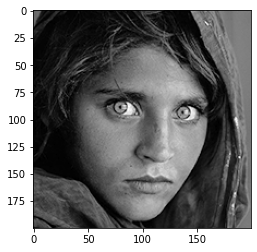

In [63]:
#Install Open CV and give tutorial on getting Jupyter notebook up and running.
# %pip install opencv-contrib-python
# %pip install matplotlib

#Import Libraries
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

#Saving and displaying an image
img = cv2.imread('Graphics/face_conv.png')

#Save the height and width
h = img.shape[0]
w = img.shape[1]

#OpenCV by defualt uses BGR instead of RGB.  First convert the color values to greyscale using the OpenCV implementation.  Then convert from BGR to RGB to draw to the screen.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#cv2.imshow('Face',img)
#Use matplotlib while using a python notebook
plt.imshow(img)


-1110.0


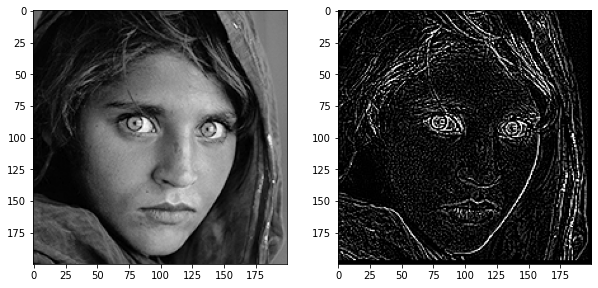

In [212]:
import numpy as np
import cv2
import copy
import matplotlib.pyplot as plt

# Code for image convolution with a 3x3 kernel
def convolve(image, kernel):
    # Get the image dimensions
    image_height = image.shape[0]
    image_width = image.shape[1] 
    # Get the kernel dimensions
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]
    # Create an empty image to store the output
    output = np.zeros((image_height, image_width))

    k = kernel.shape[0]

    # image = image / np.amax(image)
    # Loop through every pixel of the image
    for x in range(image_height-kernel_height):
        for y in range(image_width-kernel_width):

            mat = image[y:y+k, x:x+k]
            output[y,x] = int(np.sum(np.multiply(mat, kernel)))
    # output = output / np.amax(output)
    
    # output = np.clip(output, 0, 255) 
    print(np.min(output))
    if(np.min(output) < 0):
        output = np.clip(output, 0, 255) 
    return output

sharpen = np.array(([0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]), 
                    dtype=np.float32)

blur = np.array(([.111,.111,.111],
                 [.111,.111,.111],
                 [.111,.111,.111]), 
                 dtype=np.float32)

edge = np.array(([-1,-1,-1],
                 [-1,8,-1],
                 [-1,-1,-1]), 
                 dtype=np.float32)


#Saving and displaying an image
img = cv2.imread('Graphics/face_conv.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

convolve_image = convolve(img, edge)
# print(convolve_image.shape)
# print(img.shape)

fig = plt.figure(figsize = (10,10))

fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(convolve_image, cmap='gray')


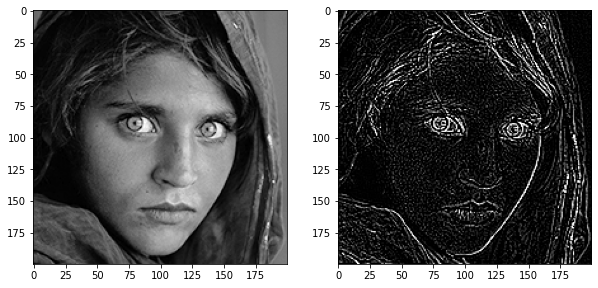

In [213]:
# OpenCV implementation
blur = np.array(([.111,.111,.111],[.111,.111,.111],[.111,.111,.111]), dtype=np.float32)
#Saving and displaying an image
img = cv2.imread('Graphics/face_conv.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imgConv2 = cv2.filter2D(img,-1, edge)

fig = plt.figure(figsize = (10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(imgConv2, cmap='gray')

### Exercises

**(1)** What is the pixel brightness value when the kernel is applied to the image?  Do you notice anything about the pixel value?  What happens if the sum of the kernel does not equal one?

$$
Kernel
\begin{bmatrix}
1/4 & 1/4 & 1/4\\
1/4 & 1/4 & 1/4\\
1/4 & 1/4 & 1/4
\end{bmatrix} 
X
\begin{bmatrix}
126 & 153 & 126\\ 
153 & 153 & 126\\
126 & 153 & 153
\end{bmatrix}
Image
$$

**(2)** Apply the sharpening filter in the module to the image provided.  
